In [155]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


from skimage.morphology import footprint_rectangle
from skimage.filters.rank import mean
from scipy.ndimage import convolve
from scipy.ndimage import gaussian_filter



# Utilizando filtros lineales, suavizantes y no lineales, así como cualquier otra operación anterior, el objetivo es tratar de restaurar la imagen a su estado original lo más fiel posible a la original. Un posible resultado aceptable puede ser.

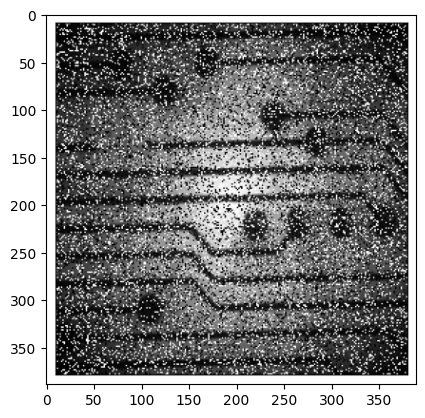

In [156]:
circuit = cv2.imread("images/circuit_noise.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(circuit, cmap= 'gray', vmin = 0, vmax= 255)
plt.show()

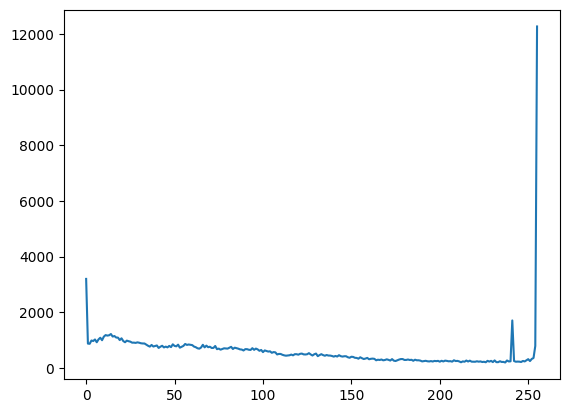

In [157]:
hist = cv2.calcHist([circuit], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

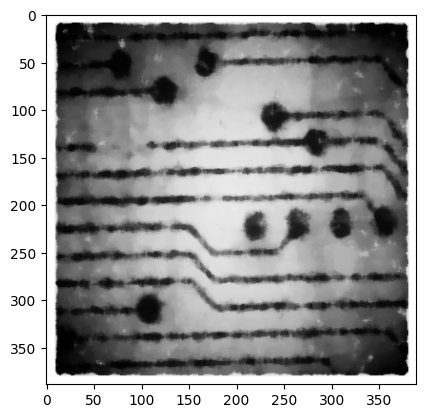

In [158]:
from skimage.morphology import disk
from skimage import exposure
from skimage.filters.rank import median


circuit_avg = median(circuit, disk(5))
circuit_avg = exposure.rescale_intensity(circuit_avg, in_range=(0, 255))
circuit_avg = cv2.equalizeHist(circuit_avg)

plt.imshow(circuit_avg, cmap= 'gray')
plt.show()

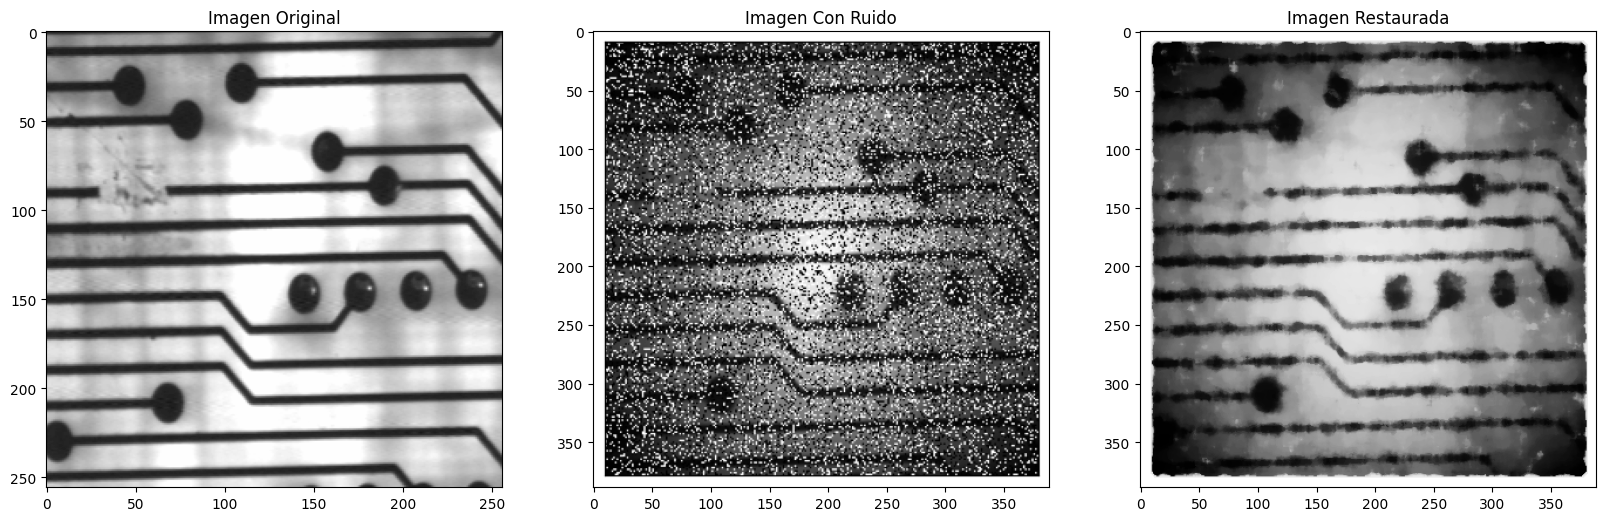

In [159]:
circuit_ = cv2.imread("images/circuit.png", cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1,3, figsize = (20,10)) 
axes[0].imshow(circuit_, cmap= 'gray', vmin = 0, vmax= 255)
axes[0].set_title('Imagen Original')
axes[1].imshow(circuit, cmap= 'gray', vmin = 0, vmax= 255)
axes[1].set_title('Imagen Con Ruido')
axes[2].imshow(circuit_avg, cmap= 'gray', vmin = 0, vmax= 255)
axes[2].set_title('Imagen Restaurada')
plt.show()